sirraleone  dataset mainpulation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "../data/sierraleone-bumbuna.csv"
dataset= pd.read_csv(file_path)
print(dataset.head(5))

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [3]:
dataset.shape

(525600, 19)

In [4]:
print("Column names and data types:")
print(dataset.dtypes)


Column names and data types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 16


In [6]:
print("\nDescriptive statistics for numerical variables:")
print(dataset.describe())


Descriptive statistics for numerical variables:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000   

 Data Quality Check

In [7]:

print("\nData Quality Check:")
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:",missing_values)


# Check for outliers or incorrect entries
# You can define thresholds or criteria based on domain knowledge
# For example, for columns GHI, DNI, and DHI, you may want to check for negative values
outliers_GHI = dataset[dataset['GHI'] < 0]
outliers_DNI = dataset[dataset['DNI'] < 0]
outliers_DHI = dataset[dataset['DHI'] < 0]

if not outliers_GHI.empty:
    print("Outliers in GHI column:")
    print(outliers_GHI)
else:
    print("No outliers found in GHI column")

if not outliers_DNI.empty:
    print("\nOutliers in DNI column:")
    print(outliers_DNI)
else:
    print("No outliers found in DNI column")

if not outliers_DHI.empty:
    print("\nOutliers in DHI column:")
    print(outliers_DHI)
else:
    print("No outliers found in DHI column")
    


Data Quality Check:
Missing Values: Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Outliers in GHI column:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3 

Time Series Analysis

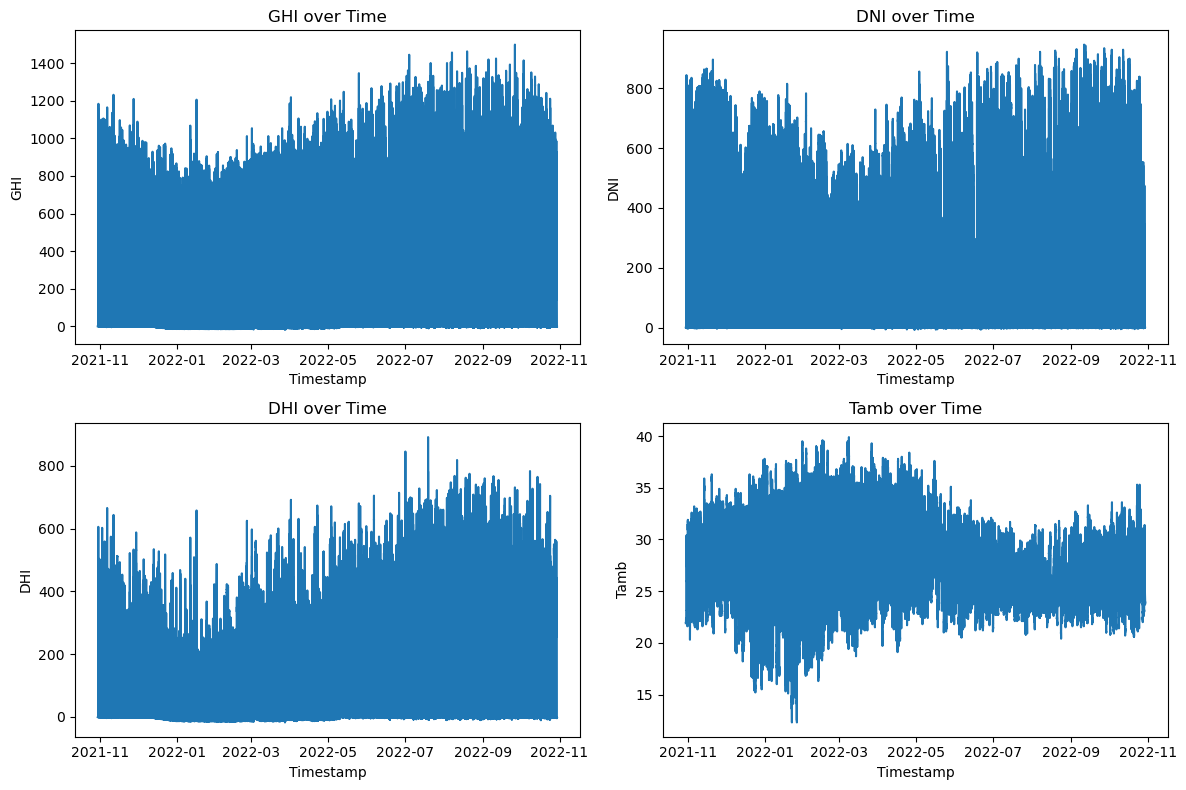

In [8]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.lineplot(x='Timestamp', y='GHI', data=dataset)
plt.title('GHI over Time')


plt.subplot(2, 2, 2)
sns.lineplot(x='Timestamp', y='DNI', data=dataset)
plt.title('DNI over Time')


plt.subplot(2, 2, 3)
sns.lineplot(x='Timestamp', y='DHI', data=dataset)
plt.title('DHI over Time')


plt.subplot(2, 2, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=dataset)
plt.title('Tamb over Time')

plt.tight_layout()
plt.show()

correlation analysis plots


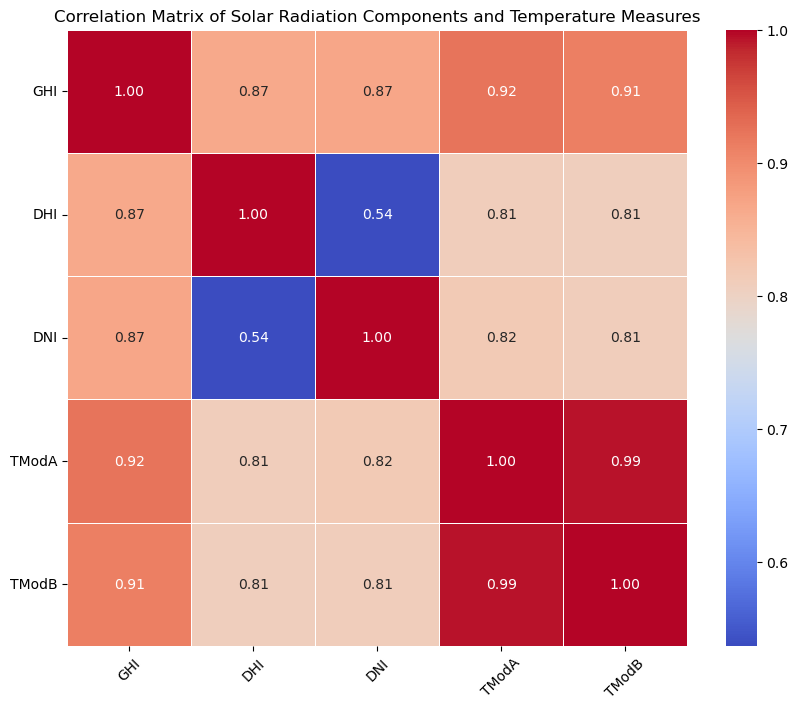

In [9]:
columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']
dataset_subset = dataset[columns_of_interest]


correlation_matrix = dataset_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature Measures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

wind analysis

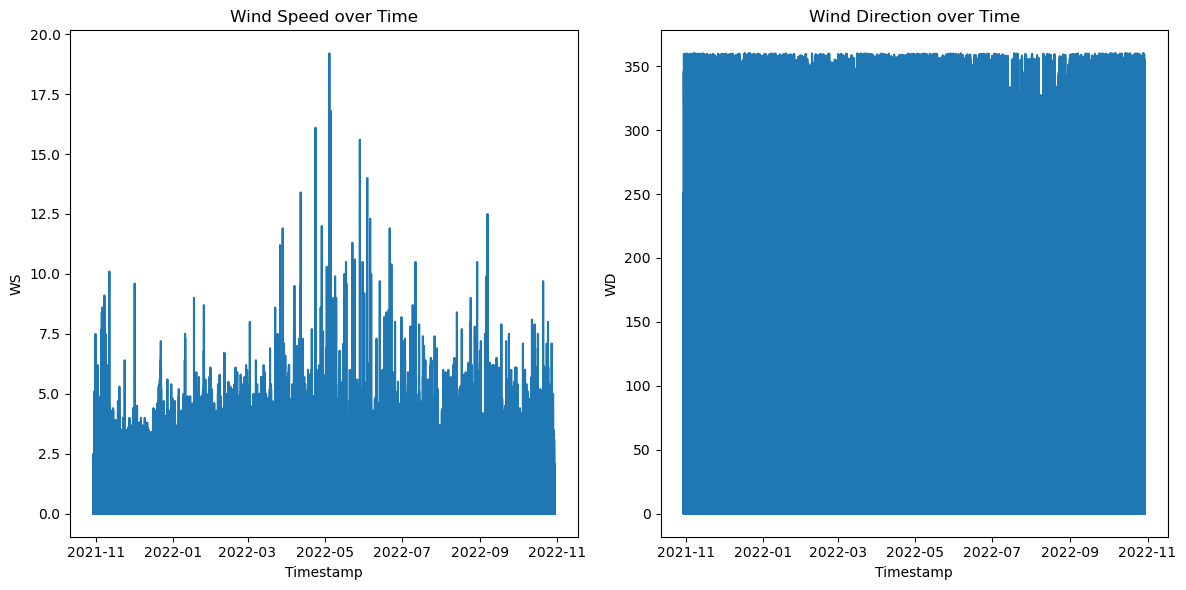

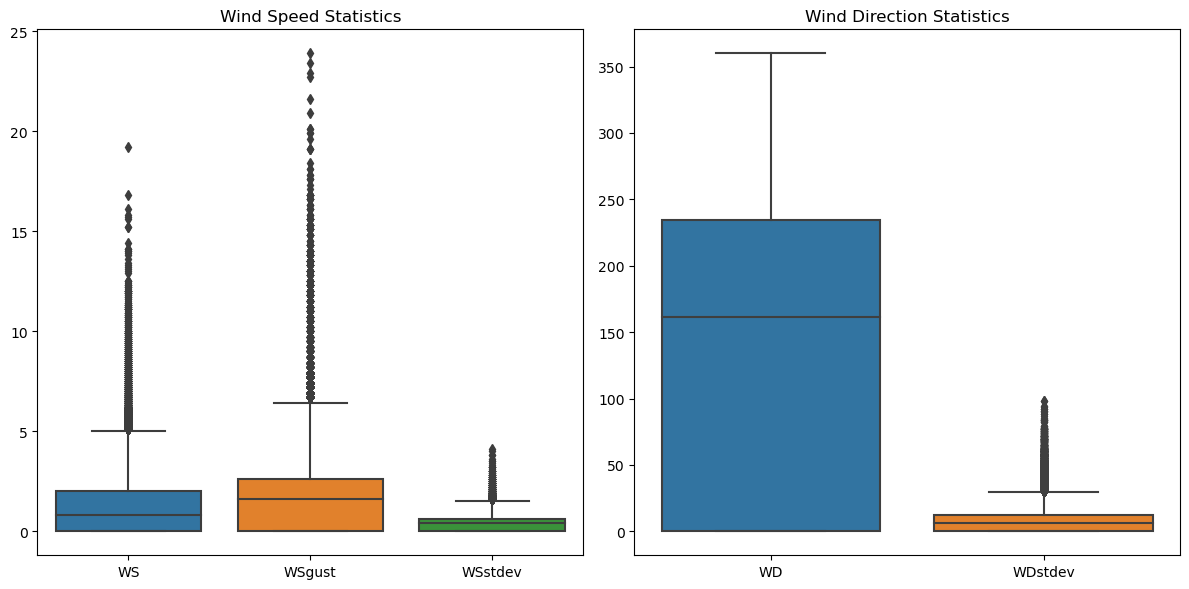

In [10]:

wind_columns = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
dataset_wind = dataset[wind_columns]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Timestamp', y='WS', data=dataset)
plt.title('Wind Speed over Time')


plt.subplot(1, 2, 2)
sns.lineplot(x='Timestamp', y='WD', data=dataset)
plt.title('Wind Direction over Time')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset_wind[['WS', 'WSgust', 'WSstdev']], orient='v')
plt.title('Wind Speed Statistics')


plt.subplot(1, 2, 2)
sns.boxplot(data=dataset_wind[['WD', 'WDstdev']], orient='v')
plt.title('Wind Direction Statistics')

plt.tight_layout()
plt.show()

tempurature analysis plot

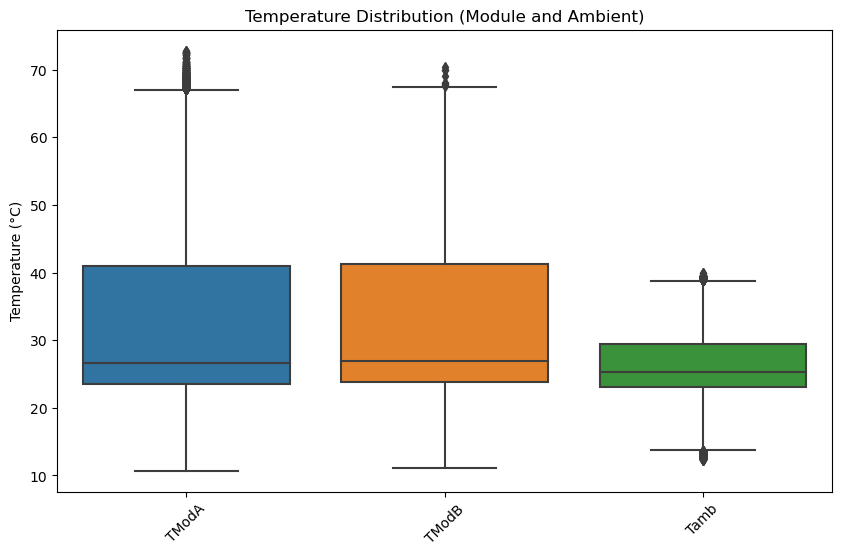

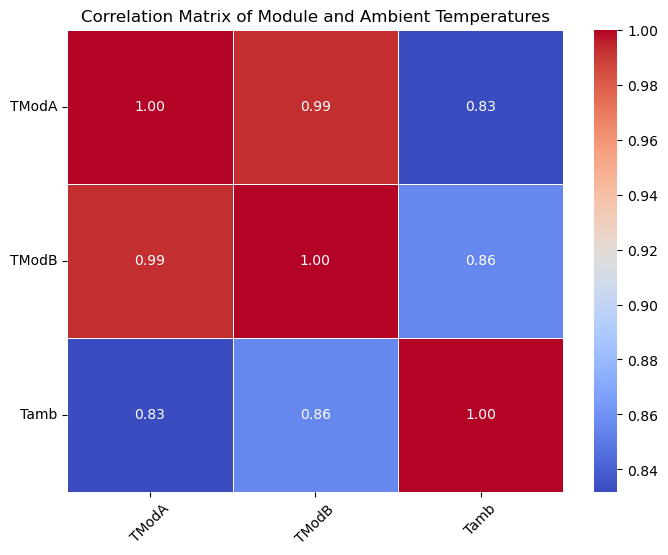

In [11]:

temperature_columns = ['TModA', 'TModB', 'Tamb']
dataset_temperatures = dataset[temperature_columns]


plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_temperatures, orient='v')
plt.title('Temperature Distribution (Module and Ambient)')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(dataset_temperatures.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Module and Ambient Temperatures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

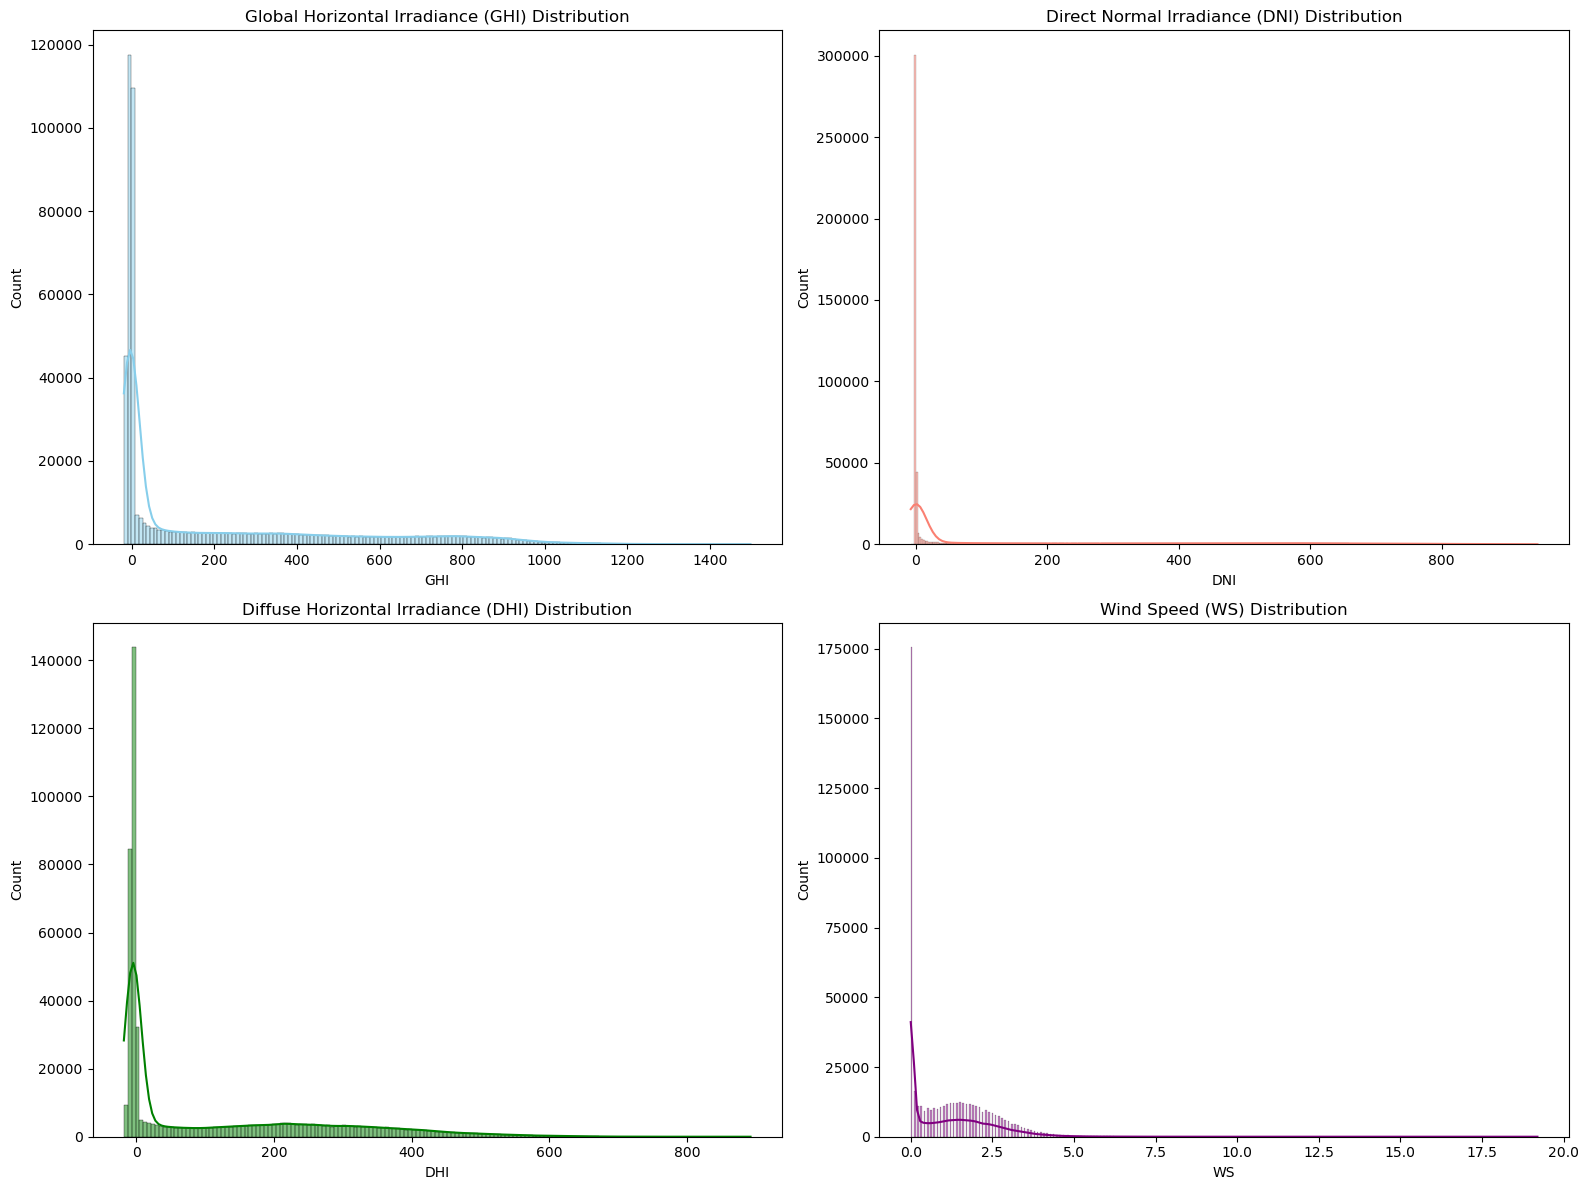

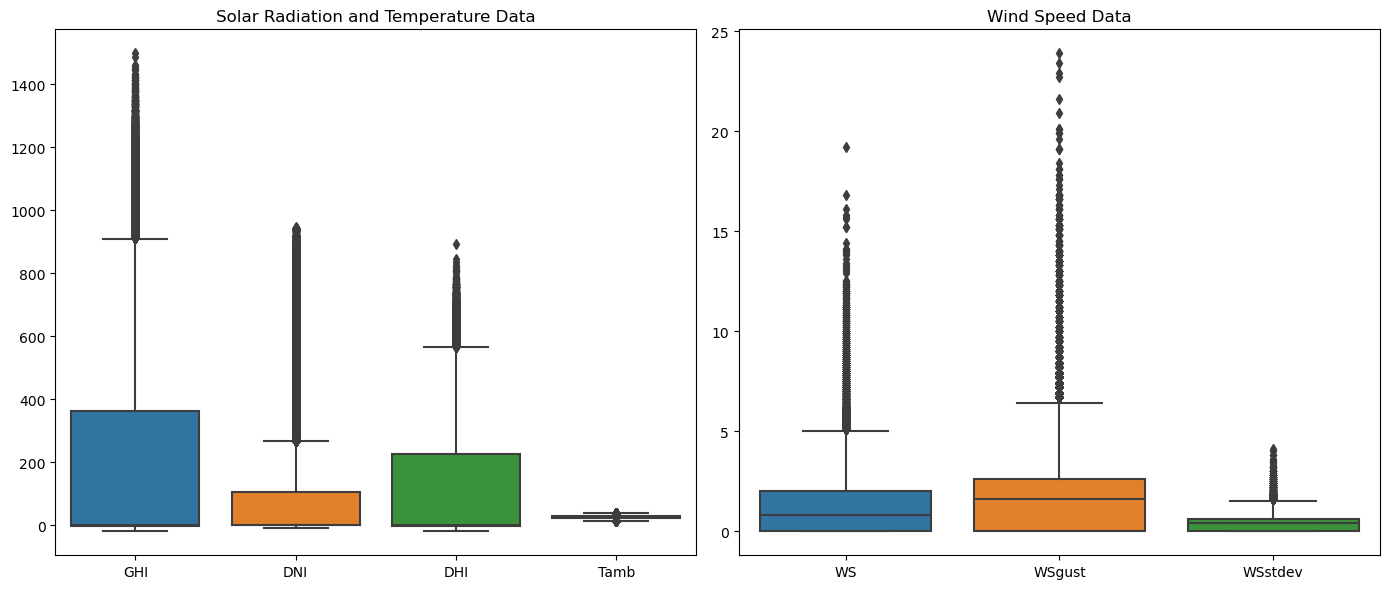

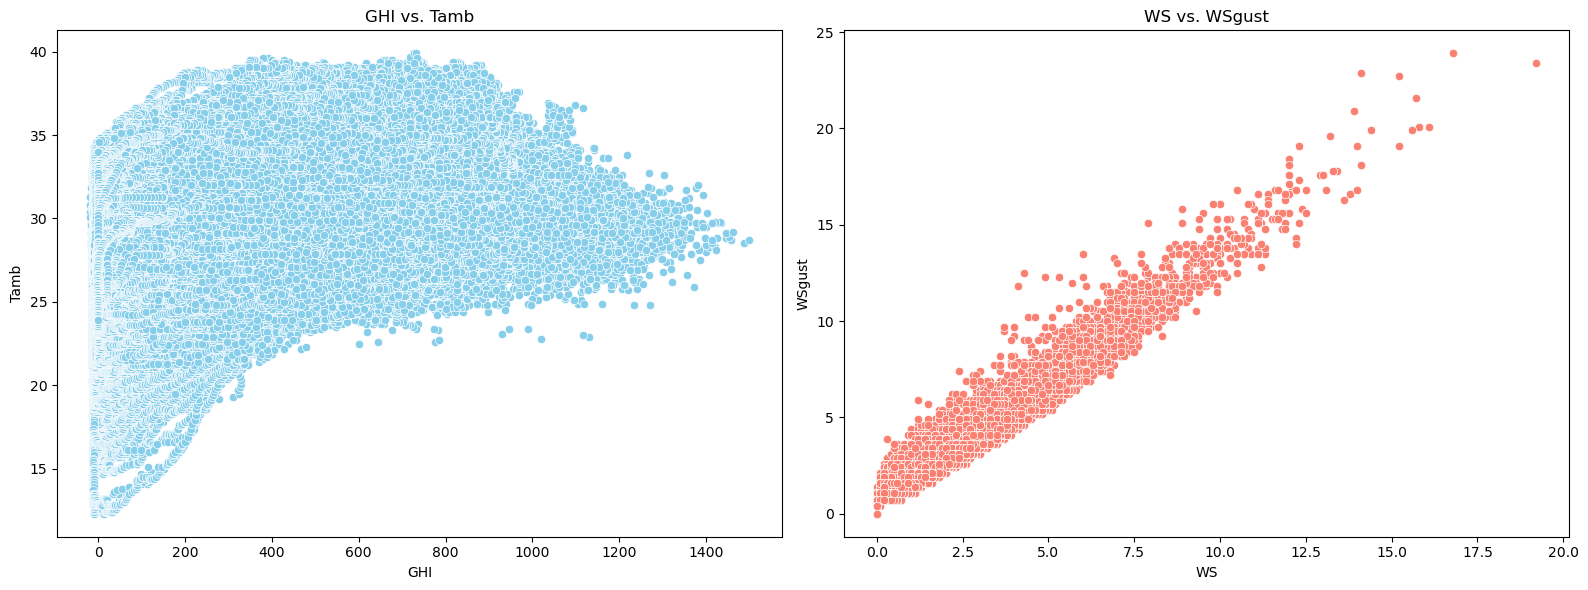

In [12]:

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.histplot(dataset['GHI'], kde=True, color='skyblue')
plt.title('Global Horizontal Irradiance (GHI) Distribution')

plt.subplot(2, 2, 2)
sns.histplot(dataset['DNI'], kde=True, color='salmon')
plt.title('Direct Normal Irradiance (DNI) Distribution')

plt.subplot(2, 2, 3)
sns.histplot(dataset['DHI'], kde=True, color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Distribution')

plt.subplot(2, 2, 4)
sns.histplot(dataset['WS'], kde=True, color='purple')
plt.title('Wind Speed (WS) Distribution')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=dataset[['GHI', 'DNI', 'DHI', 'Tamb']], orient='v')
plt.title('Solar Radiation and Temperature Data')

plt.subplot(1, 2, 2)
sns.boxplot(data=dataset[['WS', 'WSgust', 'WSstdev']], orient='v')
plt.title('Wind Speed Data')

plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='GHI', y='Tamb', data=dataset, color='skyblue')
plt.title('GHI vs. Tamb')

plt.subplot(1, 2, 2)
sns.scatterplot(x='WS', y='WSgust', data=dataset, color='salmon')
plt.title('WS vs. WSgust')

plt.tight_layout()
plt.show()

In [13]:
dataset.isnull().sum()
dataset.dropna()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments


In [14]:
# Step 1: Identify Missing Values
missing_comments = dataset['Comments'].isnull().all()

# Step 2: Handle Missing Values

    # Since the 'Comments' column appears entirely null, you might decide to drop it
dataset.drop(columns=['Comments'], inplace=True)
print("The 'Comments' column was entirely null and has been dropped.")


The 'Comments' column was entirely null and has been dropped.


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [16]:
dataset.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

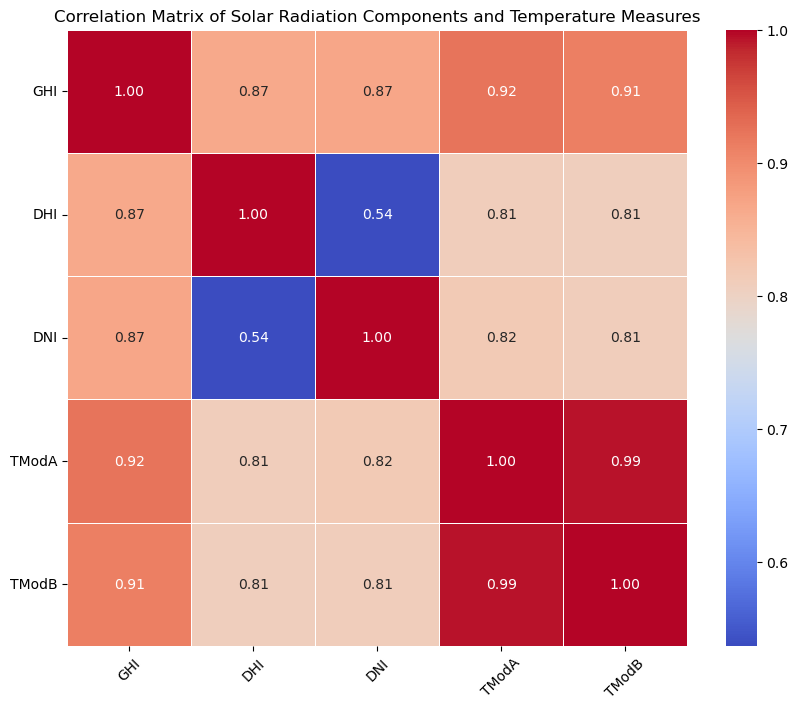

In [17]:
columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']
dataset_subset = dataset[columns_of_interest]


correlation_matrix = dataset_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature Measures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()